In [1]:
import pandas as pd
import numpy as np

np.random.seed(42)
n = 300

data = {
    'Gender': np.random.choice(['Male', 'Female'], size=n),
    'Age': np.random.randint(18, 35, n),
    'CGPA': np.round(np.random.normal(7.0, 0.7, n), 2),
    'Technical_Skills': np.random.randint(1, 11, n),
    'Internet_Access': np.random.choice(['Good', 'Moderate', 'Poor'], size=n, p=[0.6, 0.3, 0.1]),
    'City_Type': np.random.choice(['Urban', 'Semi-Urban', 'Rural'], size=n, p=[0.5, 0.3, 0.2]),
}

def classify_enrollment(row):
    if row['City_Type'] == 'Urban' and row['Internet_Access'] == 'Good':
        return 'Online'
    elif row['CGPA'] < 6.5 or row['Internet_Access'] == 'Poor':
        return 'Offline'
    else:
        return np.random.choice(['Online', 'Offline'], p=[0.5, 0.5])

df = pd.DataFrame(data)
df['Enrollment_Preference'] = df.apply(classify_enrollment, axis=1)


In [2]:
# Save dataset to CSV

In [3]:
df.to_csv("course_enrollment_classification_dataset.csv", index=False)
print("Dataset saved as 'course_enrollment_classification_dataset.csv'")

Dataset saved as 'course_enrollment_classification_dataset.csv'


In [4]:
  # Loading the Dataset

In [5]:
import pandas as pd

In [6]:
# Load the dataset

In [7]:
df = pd.read_csv("course_enrollment_classification_dataset.csv")

In [8]:
# Preview the dataset

In [9]:
df.head()

,Gender,Age,CGPA,Technical_Skills,Internet_Access,City_Type,Enrollment_Preference
0,Male,18,6.89,9,Good,Urban,Online
1,Female,18,8.30,5,Good,Rural,Online
2,Male,19,8.03,10,Moderate,Semi-Urban,Offline
3,Male,29,6.38,9,Good,Semi-Urban,Offline
4,Male,23,6.45,3,Good,Semi-Urban,Offline


In [10]:
 # Data Overview

In [11]:
# Check for missing values

In [12]:
print(df.isnull().sum())

Gender                   0
Age                      0
CGPA                     0
Technical_Skills         0
Internet_Access          0
City_Type                0
Enrollment_Preference    0
dtype: int64


In [13]:
# Check data types and distribution

In [14]:
print(df['Enrollment_Preference'].value_counts())

Enrollment_Preference
Online     156
Offline    144
Name: count, dtype: int64


In [16]:
# Visualize the Data 

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# Enrollment by gender

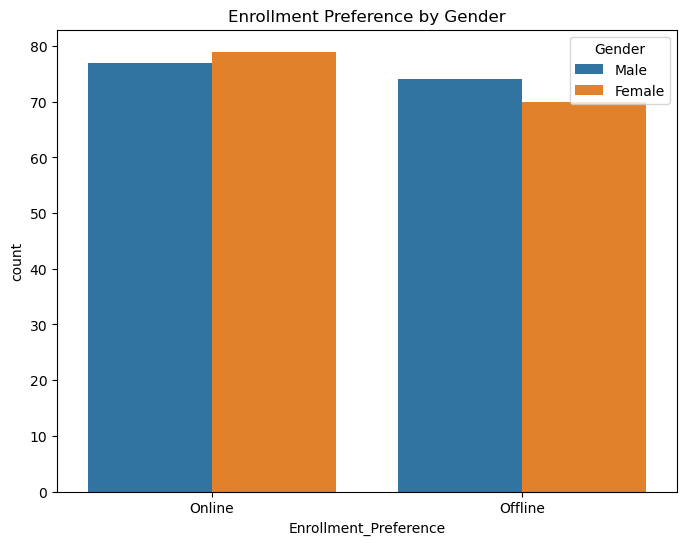

In [63]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Enrollment_Preference', hue='Gender')
plt.title("Enrollment Preference by Gender")
plt.show()

In [20]:
# CGPA comparison

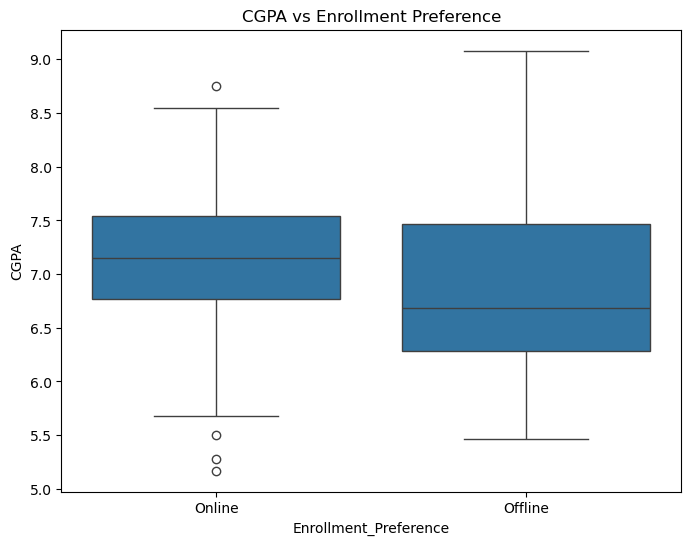

In [64]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Enrollment_Preference', y='CGPA')
plt.title("CGPA vs Enrollment Preference")
plt.show()

In [22]:
#Preprocess the Data


In [54]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [55]:
# Encode categorical features

In [ ]:
# Prepare features and target

In [ ]:
# Train/test split

In [66]:
encoders = {}
for col in ['Gender', 'Internet_Access', 'City_Type', 'Enrollment_Preference']:
    le = LabelEncoder()
    df[col + '_enc'] = le.fit_transform(df[col])
    encoders[col] = le

X = df[['Gender_enc', 'Age', 'CGPA', 'Technical_Skills', 'Internet_Access_enc', 'City_Type_enc']]
y = df['Enrollment_Preference_enc']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Evaluation 

In [ ]:
# Confusion Matrix

Classification Report:
              precision    recall  f1-score   support

     Offline       0.85      0.57      0.68        30
      Online       0.68      0.90      0.77        30

    accuracy                           0.73        60
   macro avg       0.76      0.73      0.73        60
weighted avg       0.76      0.73      0.73        60



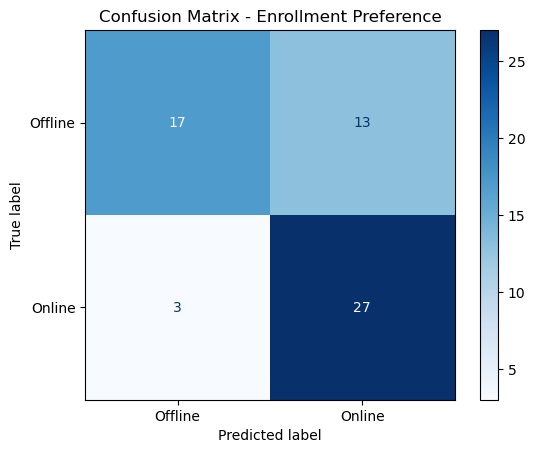

In [68]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=encoders['Enrollment_Preference'].classes_))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=encoders['Enrollment_Preference'].classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Enrollment Preference")
plt.show()

In [ ]:
# Evaluation 

In [ ]:
# Logistic Regression Model

In [70]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [71]:
# Feature importance

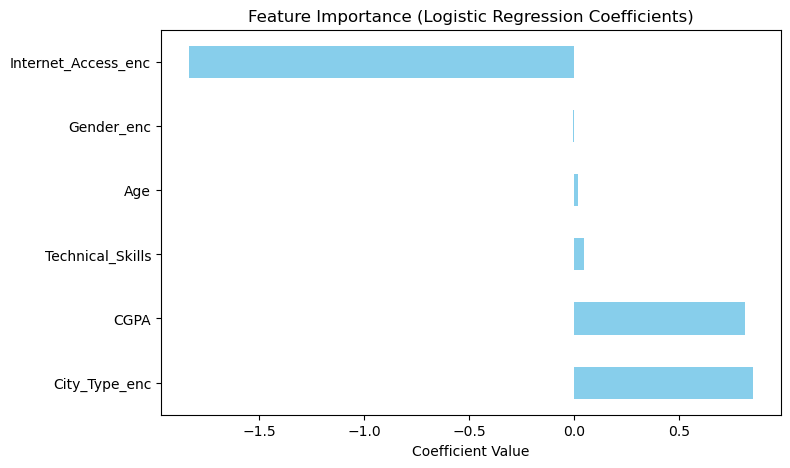

In [72]:
coeff = pd.Series(model.coef_[0], index=X.columns)
coeff.sort_values(ascending=False).plot(kind='barh', figsize=(8, 5), color='skyblue')
plt.title("Feature Importance (Logistic Regression Coefficients)")
plt.xlabel("Coefficient Value")
plt.show()